In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import os
from scipy.spatial.distance import cdist
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from collections import Counter
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [4]:
input_path = 'C:/Users/alexm/OneDrive/Ambiente de Trabalho/ESTUDO/4MASTER/2ºano/IAA/data/iris.data'

# Exercío 1

### 1.1

In [3]:
# todas as diferentes combinações de duas entradas binárias
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# saídas pretendidas para a operação OR
d = np.array([0, 1, 1, 1])

print("Input X:")
print(X)
print("\nDesired output d:", d)

Input X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Desired output d: [0 1 1 1]


### 1.2

In [4]:
# função de ativação (step threshold em 0,5)
def f(s):
    return 1 if s > 0.5 else 0

np.random.seed(42)

# inicializar aleatoriamente pesos, com valores entre -0,05 e 0,05
w0 = np.random.uniform(-0.05, 0.05)
w1 = np.random.uniform(-0.05, 0.05)
w2 = np.random.uniform(-0.05, 0.05)

print(f"Initial weights: w0={w0:.4f}, w1={w1:.4f}, w2={w2:.4f}")

# cálculo da saída inicial da rede para cada padrão de entrada
o = np.array([f(w0 + w1*x[0] + w2*x[1]) for x in X])
print("Initial outputs:", o)

Initial weights: w0=-0.0125, w1=0.0451, w2=0.0232
Initial outputs: [0 0 0 0]


### 1.3

In [5]:
# erro para cada padrão
e = d - o
print("Error:", e)

Error: [0 1 1 1]


### 1.4

In [6]:
alpha = 10e-3 # taxa de aprendizagem
dw0 = dw1 = dw2 = 0 # inicializar atualização dos pesos

for i in range(len(X)):
    dw0 += alpha * e[i]
    dw1 += alpha * X[i,0] * e[i]
    dw2 += alpha * X[i,1] * e[i]

print(f"Δw0={dw0:.6f}, Δw1={dw1:.6f}, Δw2={dw2:.6f}")

Δw0=0.030000, Δw1=0.020000, Δw2=0.020000


### 1.5 - 1.6

In [7]:
def train_perceptron(X, d, alpha, epochs):
    # inicializar pesos aleatoriamente
    w0 = np.random.uniform(-0.05, 0.05)
    w1 = np.random.uniform(-0.05, 0.05)
    w2 = np.random.uniform(-0.05, 0.05)
    
    errors = [] # guardar o erro total por época
    weights = [] # guardar evolução do peso
    convergence_epoch = None
    
    for epoch in range(epochs):
        dw0 = dw1 = dw2 = 0
        total_error = 0
        
        for i in range(len(X)):
            s = w0 + w1*X[i,0] + w2*X[i,1] # combinação linear
            o = f(s) # output binário
            e = d[i] - o # erro
            
            # acumular da atualização dos pesos
            dw0 += alpha * e
            dw1 += alpha * X[i,0] * e
            dw2 += alpha * X[i,1] * e
            total_error += abs(e)
        
        # aplicar atualizações acumuladas
        w0 += dw0
        w1 += dw1
        w2 += dw2
        
        errors.append(total_error)
        weights.append([w0, w1, w2])
        
        if convergence_epoch is None and total_error == 0:
            convergence_epoch = epoch
    
    return {
        'w0': w0, 'w1': w1, 'w2': w2,
        'errors': errors,
        'weights': np.array(weights),
        'convergence': convergence_epoch
    }

alpha = 10e-3
epochs = 20
result = train_perceptron(X, d, alpha, epochs)

for i in range(0, epochs, 5):
    w = result['weights'][i]
    print(f"Epoch {i:2d} | Error: {result['errors'][i]} | w: [{w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f}]")

Epoch  0 | Error: 3 | w: [0.040, -0.014, -0.014]
Epoch  5 | Error: 3 | w: [0.190, 0.086, 0.086]
Epoch 10 | Error: 2 | w: [0.310, 0.156, 0.156]
Epoch 15 | Error: 0 | w: [0.350, 0.176, 0.176]


### 1.6 - a)

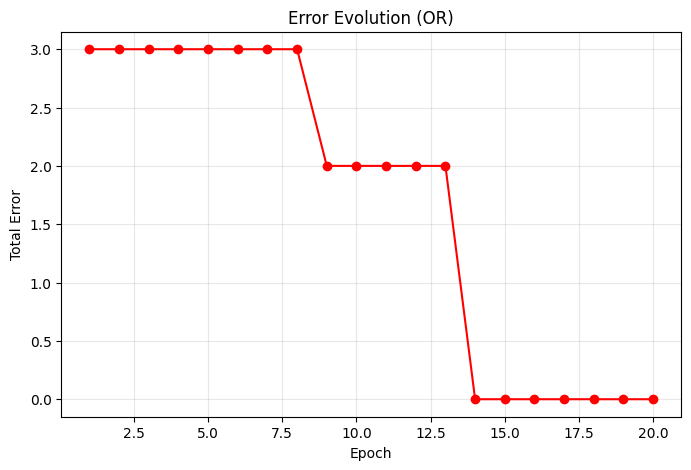

Error trend: decreases
Initial error: 3, Final error: 0

Resposta: Erro tende a diminuir ao longo das épocas.


In [8]:
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), result['errors'], 'o-', color='red')
plt.title('Error Evolution (OR)')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.grid(alpha=0.3)
plt.show()

print(f"Error trend: {'decreases' if result['errors'][-1] < result['errors'][0] else 'does not decrease'}")
print(f"Initial error: {result['errors'][0]}, Final error: {result['errors'][-1]}")

print("\nResposta: Erro tende a diminuir ao longo das épocas.")

### 1.6 - b)

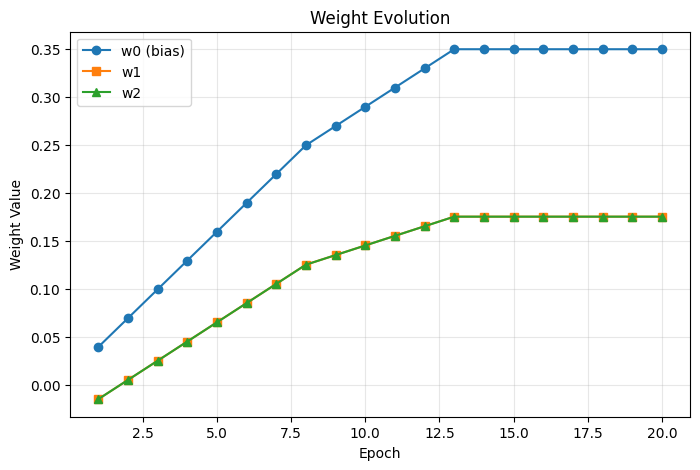

Weights converge at epoch 13

Testing convergence with 5 different initializations...
  Test 1: w=[0.286, 0.237, 0.220], Converged: True
  Test 2: w=[0.341, 0.172, 0.217], Converged: True
  Test 3: w=[0.353, 0.171, 0.168], Converged: True
  Test 4: w=[0.318, 0.200, 0.212], Converged: True
  Test 5: w=[0.323, 0.189, 0.211], Converged: True

Means: w0=0.324, w1=0.194, w2=0.206
Std devs: w0=0.023, w1=0.024, w2=0.019

Resposta: Os pesos convergem para valores estáveis após várias iterações.


In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), result['weights'][:,0], 'o-', label='w0 (bias)')
plt.plot(range(1, epochs+1), result['weights'][:,1], 's-', label='w1')
plt.plot(range(1, epochs+1), result['weights'][:,2], '^-', label='w2')
plt.title('Weight Evolution')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

if result['convergence'] is not None:
    print(f"Weights converge at epoch {result['convergence']}")
else:
    print("Weights did not converge in 20 epochs")

# testar com diferentes inicializações
print("\nTesting convergence with 5 different initializations...")
final_weights = []
for i in range(5):
    res = train_perceptron(X, d, alpha, epochs)
    final_weights.append([res['w0'], res['w1'], res['w2']])
    print(f"  Test {i+1}: w=[{res['w0']:.3f}, {res['w1']:.3f}, {res['w2']:.3f}], Converged: {res['convergence'] is not None}")

final_weights = np.array(final_weights)
print(f"\nMeans: w0={np.mean(final_weights[:,0]):.3f}, w1={np.mean(final_weights[:,1]):.3f}, w2={np.mean(final_weights[:,2]):.3f}")
print(f"Std devs: w0={np.std(final_weights[:,0]):.3f}, w1={np.std(final_weights[:,1]):.3f}, w2={np.std(final_weights[:,2]):.3f}")
print("\nResposta: Os pesos convergem para valores estáveis após várias iterações.")

### 1.6 - c)

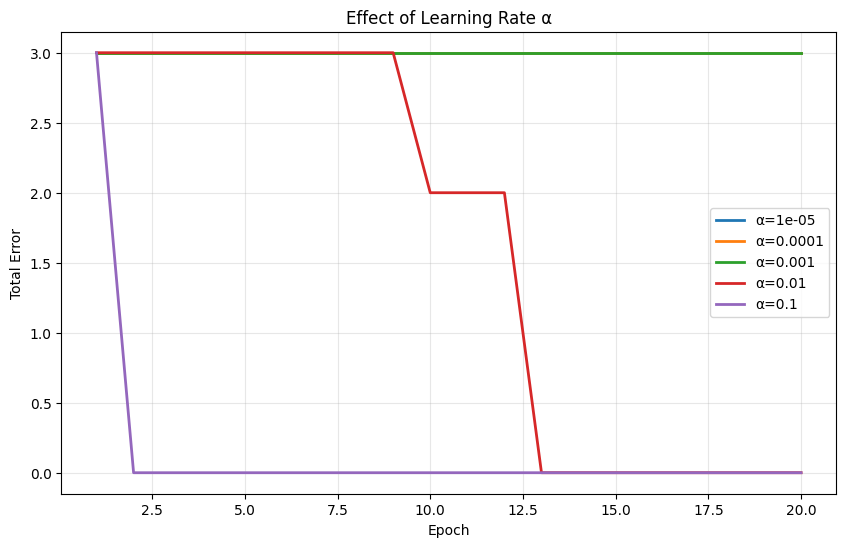


Results by α:
  α=1e-05: Convergence at did not converge
  α=1e-04: Convergence at did not converge
  α=1e-03: Convergence at did not converge
  α=1e-02: Convergence at epoch 12
  α=1e-01: Convergence at epoch 1

Best α: 0.1 (converges at epoch 1)

Resposta: Taxas de aprendizagem muito pequenas apresentam um treino lento, comparativamente as taxas maiores.


In [10]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 0.1]
convergences = []

plt.figure(figsize=(10,6))
for a in alphas:
    res = train_perceptron(X, d, a, epochs)
    plt.plot(range(1, epochs+1), res['errors'], label=f'α={a}', linewidth=2)
    conv = res['convergence'] if res['convergence'] is not None else epochs
    convergences.append(conv)

plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Effect of Learning Rate α')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\nResults by α:")
for i, a in enumerate(alphas):
    status = f"epoch {convergences[i]}" if convergences[i] < epochs else "did not converge"
    print(f"  α={a:.0e}: Convergence at {status}")

best_idx = np.argmin(convergences)
print(f"\nBest α: {alphas[best_idx]} (converges at epoch {convergences[best_idx]})")
print("\nResposta: Taxas de aprendizagem muito pequenas apresentam um treino lento, comparativamente as taxas maiores.")

### 1.6 - d)

Mean epochs to convergence: 1.87 ± 0.50
Min: 1, Max: 3


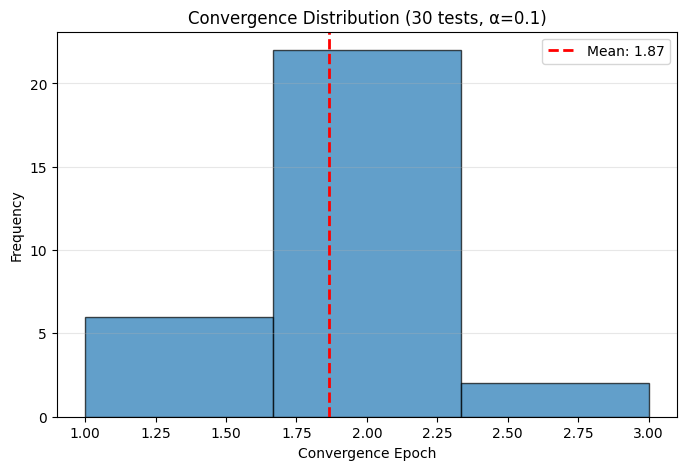


Resposta: Em média, demorou 1.87 épocas para convergir.


In [11]:
best_alpha = alphas[best_idx]
nr_tests = 30
epochs_to_convergence = []

for _ in range(nr_tests):
    res = train_perceptron(X, d, best_alpha, epochs)
    if res['convergence'] is not None:
        epochs_to_convergence.append(res['convergence'])
    else:
        epochs_to_convergence.append(epochs)

epochs_to_convergence = np.array(epochs_to_convergence)
mean_conv = np.mean(epochs_to_convergence)
std_conv = np.std(epochs_to_convergence)

print(f"Mean epochs to convergence: {mean_conv:.2f} ± {std_conv:.2f}")
print(f"Min: {np.min(epochs_to_convergence)}, Max: {np.max(epochs_to_convergence)}")

plt.figure(figsize=(8,5))
plt.hist(epochs_to_convergence, bins=min(10, len(np.unique(epochs_to_convergence))), 
         edgecolor='black', alpha=0.7)
plt.axvline(mean_conv, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_conv:.2f}')
plt.xlabel('Convergence Epoch')
plt.ylabel('Frequency')
plt.title(f'Convergence Distribution (30 tests, α={best_alpha})')
plt.legend()
plt.grid(alpha=0.3, axis='y')
plt.show()
print(f"\nResposta: Em média, demorou {mean_conv:.2f} épocas para convergir.")

### 1.7

Total points: 1000
Class 0: 500 points
Class 1: 500 points


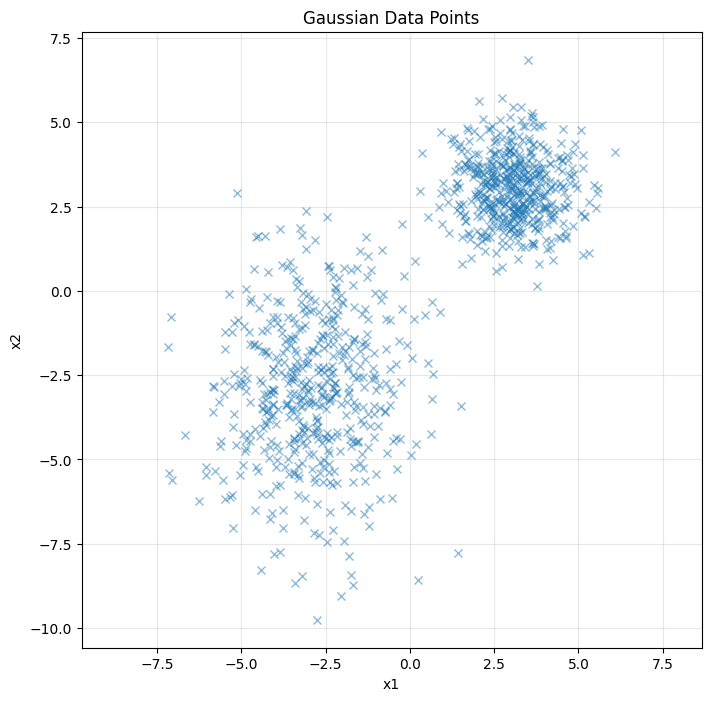


Data saved to 'gaussian_data.csv'


In [12]:
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean1, cov1, 500).T
a = np.vstack([a, np.zeros(500)])

mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean2, cov2, 500).T
b = np.vstack([b, np.ones(500)])

data = np.hstack([a, b]).T
np.random.shuffle(data)

print(f"Total points: {len(data)}")
print(f"Class 0: {np.sum(data[:, 2] == 0)} points")
print(f"Class 1: {np.sum(data[:, 2] == 1)} points")

x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(8,8))
plt.plot(x, y, 'x', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gaussian Data Points')
plt.axis('equal')
plt.grid(alpha=0.3)
plt.show()

np.savetxt('gaussian_data.csv', data, delimiter=',')
print("\nData saved to 'gaussian_data.csv'")

### 1.8

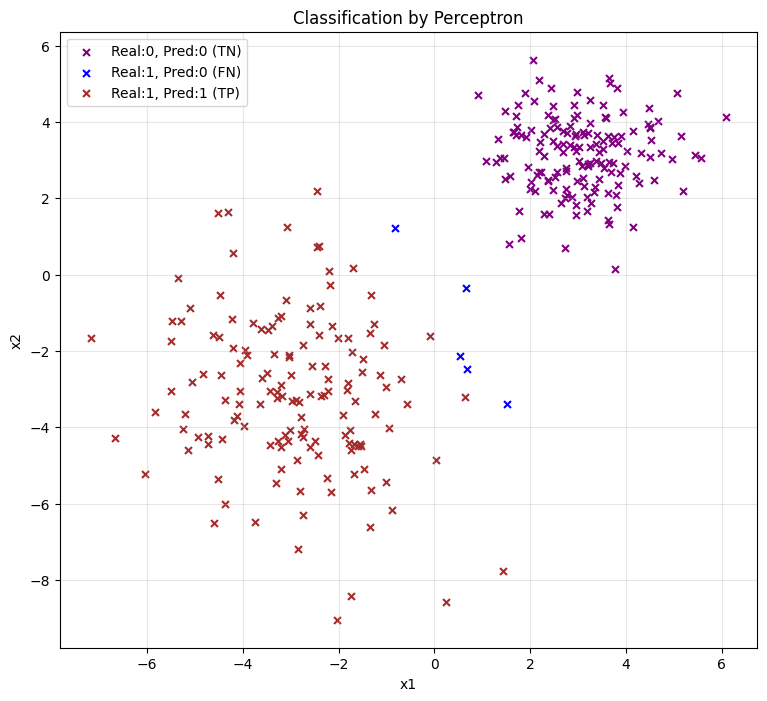

In [13]:
def train_perceptron_gaussian(X_train, y_train, alpha=1e-4, epochs=100):
    w0 = np.random.uniform(-0.05, 0.05)
    w1 = np.random.uniform(-0.05, 0.05)
    w2 = np.random.uniform(-0.05, 0.05)
    
    for epoch in range(epochs):
        dw0 = dw1 = dw2 = 0
        
        for i in range(len(X_train)):
            x1, x2 = X_train[i]
            s = w0 + w1*x1 + w2*x2
            o = f(s)
            e = y_train[i] - o
            
            dw0 += alpha * e
            dw1 += alpha * x1 * e
            dw2 += alpha * x2 * e
        
        w0 += dw0
        w1 += dw1
        w2 += dw2
    
    return w0, w1, w2

train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)
X_train = train_set[:, :2]
y_train = train_set[:, 2]
X_test = test_set[:, :2]
y_test = test_set[:, 2]

w0, w1, w2 = train_perceptron_gaussian(X_train, y_train, alpha=1e-4, epochs=100)

TP = TN = FP = FN = 0
l0_p0, l0_p1, l1_p0, l1_p1 = [], [], [], []

for i in range(len(X_test)):
    x1, x2 = X_test[i]
    s = w0 + w1*x1 + w2*x2
    o = f(s)
    label = int(y_test[i])
    
    if label == 0 and o == 0:
        TN += 1
        l0_p0.append([x1, x2])
    elif label == 0 and o == 1:
        FP += 1
        l0_p1.append([x1, x2])
    elif label == 1 and o == 0:
        FN += 1
        l1_p0.append([x1, x2])
    elif label == 1 and o == 1:
        TP += 1
        l1_p1.append([x1, x2])

plt.figure(figsize=(9,8))
if len(l0_p0) > 0:
    l0_p0 = np.array(l0_p0)
    plt.scatter(l0_p0[:,0], l0_p0[:,1], c='purple', label='Real:0, Pred:0 (TN)', marker='x', s=25)
if len(l0_p1) > 0:
    l0_p1 = np.array(l0_p1)
    plt.scatter(l0_p1[:,0], l0_p1[:,1], c='yellow', label='Real:0, Pred:1 (FP)', marker='x', s=25)
if len(l1_p0) > 0:
    l1_p0 = np.array(l1_p0)
    plt.scatter(l1_p0[:,0], l1_p0[:,1], c='blue', label='Real:1, Pred:0 (FN)', marker='x', s=25)
if len(l1_p1) > 0:
    l1_p1 = np.array(l1_p1)
    plt.scatter(l1_p1[:,0], l1_p1[:,1], c='brown', label='Real:1, Pred:1 (TP)', marker='x', s=25)

plt.title('Classification by Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 1.9

Confusion Matrix:
TN: 151, FP: 0, FN: 5, TP: 144


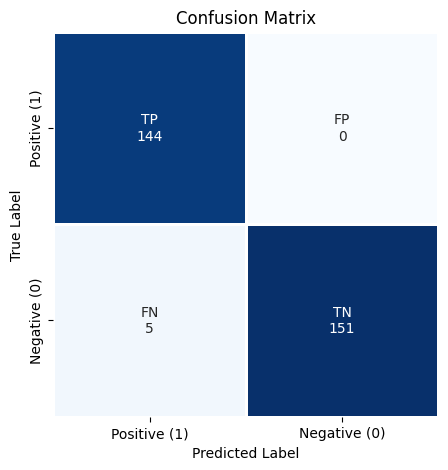

In [14]:
print("Confusion Matrix:")
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

cm = np.array([[TP, FP], [FN, TN]])
labels = np.array([["TP", "FP"], ["FN", "TN"]])
annot = np.array([[f"{labels[i,j]}\n{cm[i,j]}" for j in range(2)] for i in range(2)])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt="", cmap="Blues", cbar=False, square=True, linewidths=2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["Positive (1)", "Negative (0)"], ha='center')
plt.yticks([0.5, 1.5], ["Positive (1)", "Negative (0)"], va='center')
plt.title("Confusion Matrix")
plt.show()

### 1.10

In [15]:
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for _ in range(30):
    train_set, test_set = train_test_split(data, test_size=0.3, random_state=None)
    X_train = train_set[:, :2]
    y_train = train_set[:, 2]
    X_test = test_set[:, :2]
    y_test = test_set[:, 2]
    
    w0, w1, w2 = train_perceptron_gaussian(X_train, y_train, alpha=1e-4, epochs=100)
    
    TP = TN = FP = FN = 0
    for i in range(len(X_test)):
        x1, x2 = X_test[i]
        s = w0 + w1*x1 + w2*x2
        o = f(s)
        label = int(y_test[i])
        
        if label == 0 and o == 0:
            TN += 1
        elif label == 0 and o == 1:
            FP += 1
        elif label == 1 and o == 0:
            FN += 1
        elif label == 1 and o == 1:
            TP += 1
    
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

print("\nMetrics (mean ± std):")
print(f"Accuracy:  {np.mean(metrics['accuracy']):.4f} ± {np.std(metrics['accuracy']):.4f}")
print(f"Precision: {np.mean(metrics['precision']):.4f} ± {np.std(metrics['precision']):.4f}")
print(f"Recall:    {np.mean(metrics['recall']):.4f} ± {np.std(metrics['recall']):.4f}")
print(f"F1-Score:  {np.mean(metrics['f1']):.4f} ± {np.std(metrics['f1']):.4f}")



Metrics (mean ± std):
Accuracy:  0.9824 ± 0.0066
Precision: 1.0000 ± 0.0000
Recall:    0.9647 ± 0.0132
F1-Score:  0.9820 ± 0.0068


# Exercío 2

### Análise da Data 

In [17]:
# fetch dataset 
iris = fetch_ucirepo(id=53)   
# data (as pandas dataframes) 

# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [18]:
iris.data.features 

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
iris.data.targets

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [20]:
iris.data.original

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
iris.data.original.groupby('class').size()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Visualização da Data

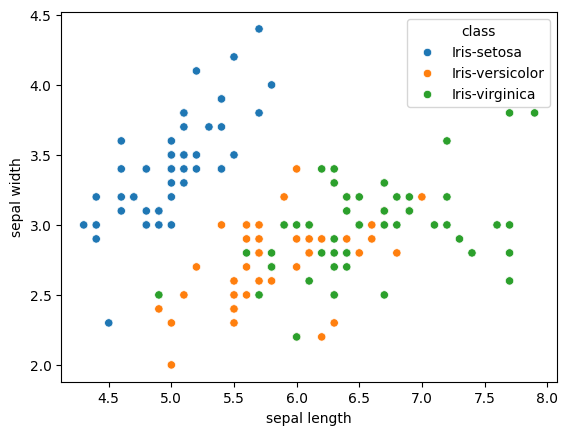

In [22]:
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=iris.data.original)
plt.show()

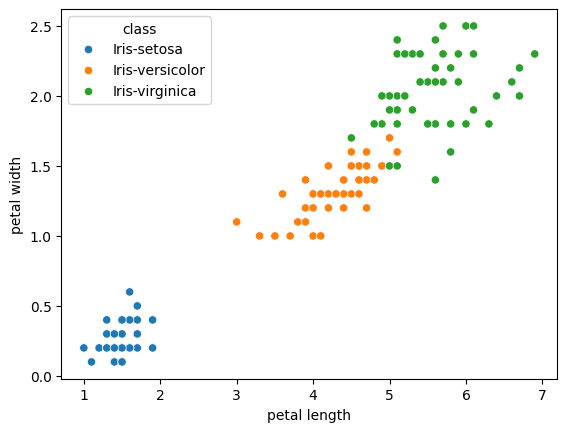

In [23]:
sns.scatterplot(x='petal length', y='petal width', hue='class', data=iris.data.original)
plt.show()

### Preparação da Data

In [24]:
X = iris.data.features 
y = iris.data.targets 

In [25]:
X = iris.data.features.to_numpy()
y = iris.data.targets.to_numpy().ravel()

In [26]:
# encode labels 
# Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
# Splitting dataset into training set and test set

test_size = 0.3
np.random.seed(42)

# Embaralhar índices
indices = np.arange(len(X))
np.random.shuffle(indices)

# Calcular ponto de divisão
split_point = int(len(X) * (1 - test_size))

# Dividir dados
train_idx = indices[:split_point]
test_idx = indices[split_point:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#### Experimento: KNN com partições aleatórias 70/30

- Repetimos 30 vezes para cada k em {3, 7, 11}
- Em cada repetição: dividimos em treino/teste (70/30) com uma semente aleatória diferente
- Métricas: Accuracy e F1 macro
- Visualização: boxplot com whiskers para comparar distribuições das métricas por k

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y)
  and would like to capture the relationship between  x
  and  y
 . More formally, our goal is to learn a function  h:X→Y
  so that given an unseen observation  x
 ,  h(x)
  can confidently predict the corresponding output  y
 .

In [29]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [30]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

### Prediction

In [31]:
k_values = [3, 7, 11]
n_runs = 30
results = {k: [] for k in k_values}


Matriz de confusão para k = 3:
[[17  0  0]
 [ 0 16  0]
 [ 0  1 11]]


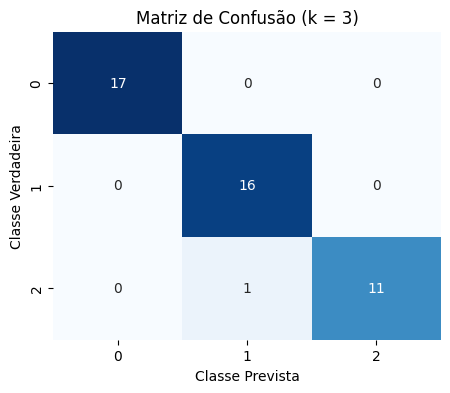


Matriz de confusão para k = 7:
[[17  0  0]
 [ 0 16  0]
 [ 0  1 11]]


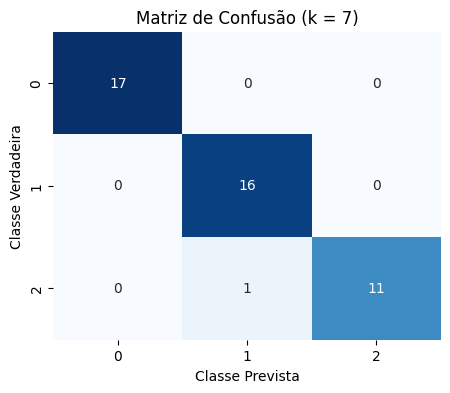


Matriz de confusão para k = 11:
[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]


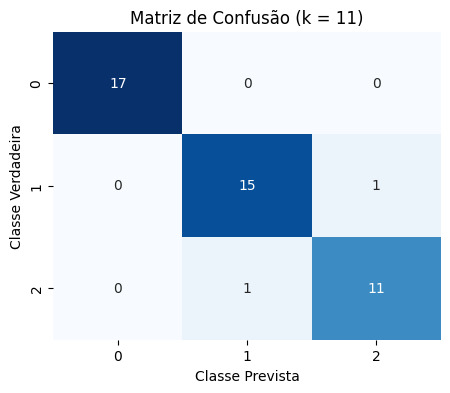

C:\Users\alexm\AppData\Local\Temp\ipykernel_24888\2404470865.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[k] for k in k_values], labels=k_values, patch_artist=True)


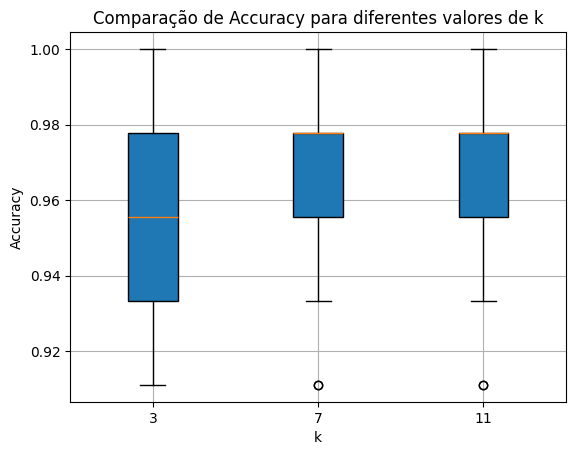

In [36]:
for k in k_values:
    for seed in range(n_runs):
        np.random.seed(seed)
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        split_point = int(len(X) * 0.7)

        train_idx = indices[:split_point]
        test_idx = indices[split_point:]

        # X e y são arrays NumPy, portanto indexação direta
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Predições
        predictions = [knn_predict(X_train, y_train, test_point, k) for test_point in X_test]

        # Accuracy manual
        correct = sum(p == t for p, t in zip(predictions, y_test))
        acc = correct / len(y_test)
        results[k].append(acc)

    # --- Cálculo manual da matriz de confusão (para o último seed) ---
    classes = np.unique(np.concatenate((y_test, predictions)))
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)

    for true, pred in zip(y_test, predictions):
        i = np.where(classes == true)[0][0]
        j = np.where(classes == pred)[0][0]
        cm[i, j] += 1

    # --- Mostrar matriz de confusão ---
    print(f"\nMatriz de confusão para k = {k}:\n{cm}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(f"Matriz de Confusão (k = {k})")
    plt.xlabel("Classe Prevista")
    plt.ylabel("Classe Verdadeira")
    plt.show()

# --- Boxplot final de comparação ---
plt.boxplot([results[k] for k in k_values], labels=k_values, patch_artist=True)
plt.title("Comparação de Accuracy para diferentes valores de k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot_knn_decision(X_train, y_train, test_point, k):
    # Converter para arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    test_point = np.array(test_point)

    # Calcular distâncias
    distances = [np.sqrt(np.sum((x - test_point)**2)) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]

    # Vizinhos mais próximos
    nearest_points = X_train[nearest_indices]
    nearest_labels = y_train[nearest_indices]

    # Previsão
    predicted_label = Counter(nearest_labels).most_common(1)[0][0]

    # --- Plot ---
    plt.figure(figsize=(7, 6))

    # Plot dos pontos de treino
    for label in np.unique(y_train):
        plt.scatter(X_train[y_train == label, 0],
                    X_train[y_train == label, 1],
                    label=f"Classe {label}", alpha=0.6)

    # Plot do ponto de teste
    plt.scatter(test_point[0], test_point[1], c='black', s=120, marker='X', label='Ponto de Teste')

    # Destacar vizinhos
    plt.scatter(nearest_points[:, 0], nearest_points[:, 1],
                s=150, edgecolors='red', facecolors='none', linewidths=2,
                label=f'{k} vizinhos mais próximos')

    # Linhas de ligação
    for neighbor in nearest_points:
        plt.plot([test_point[0], neighbor[0]], [test_point[1], neighbor[1]],
                 'r--', alpha=0.5)

    plt.title(f"Exemplo de previsão KNN (k={k})\nClasse prevista: {predicted_label}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Ponto de teste: {test_point}")
    print(f"Vizinhos escolhidos (k={k}): {nearest_points}")
    print(f"Labels dos vizinhos: {nearest_labels}")
    print(f"Classe prevista: {predicted_label}")


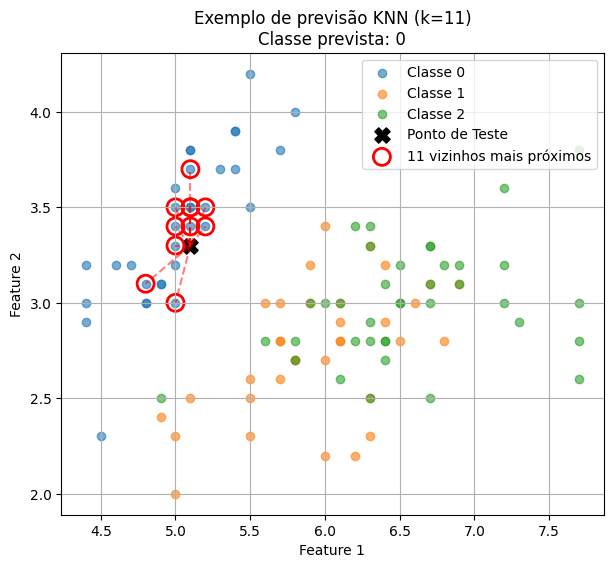

Ponto de teste: [5.1 3.3 1.7 0.5]
Vizinhos escolhidos (k=11): [[5.  3.5 1.6 0.6]
 [5.1 3.4 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [5.2 3.5 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [5.  3.  1.6 0.2]
 [5.2 3.4 1.4 0.2]
 [5.1 3.7 1.5 0.4]
 [5.1 3.5 1.4 0.2]
 [4.8 3.1 1.6 0.2]]
Labels dos vizinhos: [0 0 0 0 0 0 0 0 0 0 0]
Classe prevista: 0
Distâncias ordenadas (menores primeiro):
[0.26457513 0.37416574 0.38729833 0.41231056 0.42426407 0.43588989
 0.4472136  0.4472136  0.45825757 0.46904158 0.47958315 0.52915026
 0.52915026 0.52915026 0.55677644]


In [39]:
idx = 20
test_point = X_test[idx]

plot_knn_decision(X_train, y_train, test_point, k=11)

distances = [np.sqrt(np.sum((x - test_point)**2)) for x in X_train]
nearest_indices = np.argsort(distances)
print("Distâncias ordenadas (menores primeiro):")
print(np.array(distances)[nearest_indices[:15]])

In [41]:
i = 10  # índice do ponto suspeito
print("Ponto:", X_train[i])
print("Distância 4D real:", euclidean_distance(X_train[i], test_point))

Ponto: [6.3 3.3 6.  2.5]
Distância 4D real: 4.8918299234540035


In [49]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_knn_multiview(X_train, y_train, test_point, k, feature_names=None):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    test_point = np.array(test_point)

    # Calcular distâncias 4D
    distances = [np.sqrt(np.sum((x - test_point)**2)) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_points = X_train[nearest_indices]
    nearest_labels = y_train[nearest_indices]
    predicted_label = Counter(nearest_labels).most_common(1)[0][0]

    print(f"Classe prevista: {predicted_label}")
    print(f"Distâncias (menores primeiro): {np.sort(distances)[:k]}")

    # --- Gráficos 2D com diferentes pares de features ---
    pairs = [(0, 1), (2, 3), (0, 2)]  # (sépalas), (pétalas), (sépala × pétala)
    titles = ["Sépalas", "Pétalas", "Sépala × Pétala"]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for ax, (i, j), title in zip(axes, pairs, titles):
        for label in np.unique(y_train):
            ax.scatter(X_train[y_train == label, i],
                       X_train[y_train == label, j],
                       label=f"Classe {label}", alpha=0.6)
        ax.scatter(test_point[i], test_point[j],
                   c='black', s=100, marker='X', label='Ponto de Teste')
        ax.scatter(nearest_points[:, i], nearest_points[:, j],
                   s=150, edgecolors='red', facecolors='none', linewidths=2,
                   label=f'{k} vizinhos')
        
        xlabel = feature_names[i] if feature_names is not None else f"Feature {i+1}"
        ylabel = feature_names[j] if feature_names is not None else f"Feature {j+1}"
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(f"{title}\n(k={k})", fontsize=11)
        ax.grid(True)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right")
    fig.suptitle(f"Visualização de KNN com diferentes pares de features\nClasse prevista: {predicted_label}",
                 fontsize=14, y=1.03)
    
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # ajusta margens
    plt.show()


Classe prevista: 0
Distâncias (menores primeiro): [0.26457513 0.37416574 0.38729833 0.41231056 0.42426407 0.43588989
 0.4472136  0.4472136  0.45825757 0.46904158 0.47958315]


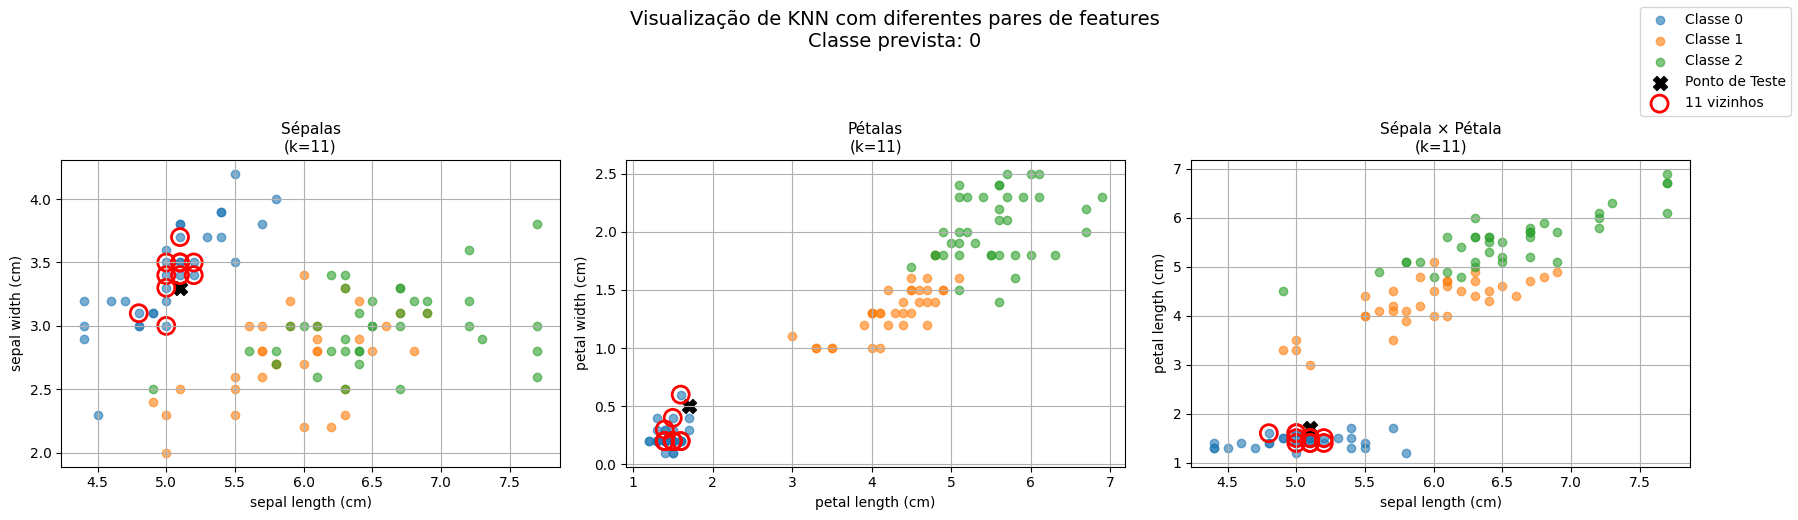

In [51]:
feature_names = ["sepal length (cm)", "sepal width (cm)",
                 "petal length (cm)", "petal width (cm)"]

plot_knn_multiview(X_train, y_train, test_point, k=11, feature_names=feature_names)


Com K par: Se houver apenas duas classes (classificação binária), é possível que o número de vizinhos pertencentes a cada classe seja exatamente igual (exemplo: $K=4$, 2 vizinhos da Classe A e 2 vizinhos da Classe B). Isso resulta em um empate, e o algoritmo não consegue decidir a classe sem regras de desempate adicionais, o que complica a implementação e a interpretação.

Com K ímpar: Ao usar um $K$ ímpar, o empate é impossível em problemas de classificação binária (duas classes), pois uma classe sempre terá pelo menos um voto a mais que a outra, garantindo uma maioria.

## Exercício 3

In [52]:
X = pd.DataFrame(X, columns=iris.data.features.columns)

In [53]:
def discretize_column(col):
    low, high = np.percentile(col, [33, 66])
    categories = []
    for val in col:
        if val <= low:
            categories.append("low")
        elif val <= high:
            categories.append("medium")
        else:
            categories.append("high")
    return categories

X_disc = X.apply(discretize_column)

### Naive Bayes (versão categórica)

In [54]:
class NaiveBayesCategorical:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.likelihoods = {}
        
        for c in self.classes:
            subset = X[y == c]
            self.likelihoods[c] = {}
            for col in X.columns:
                value_counts = subset[col].value_counts(normalize=True)
                self.likelihoods[c][col] = value_counts.to_dict()
    
    def predict_one(self, x):
        probs = {}
        for c in self.classes:
            prob = np.log(self.priors[c])
            for col, val in x.items():
                prob += np.log(self.likelihoods[c][col].get(val, 1e-6))  # suavização
            probs[c] = prob
        return max(probs, key=probs.get)
    
    def predict(self, X):
        return np.array([self.predict_one(row) for _, row in X.iterrows()])

### Avaliação com 30 partições aleatórias (70%/30%)

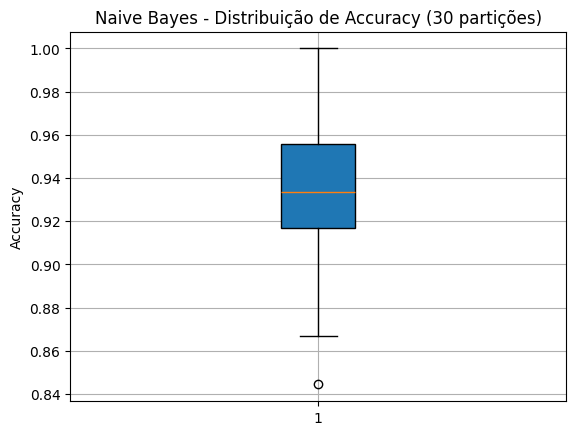

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Discretização (mantém igual) ---
def discretize_column(col):
    low, high = np.percentile(col, [33, 66])
    categories = []
    for val in col:
        if val <= low:
            categories.append("low")
        elif val <= high:
            categories.append("medium")
        else:
            categories.append("high")
    return categories

X = pd.DataFrame(X, columns=iris.data.features.columns)
X_disc = X.apply(discretize_column)

# --- Classe Naive Bayes categórico (igual ao teu código) ---
class NaiveBayesCategorical:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.likelihoods = {}
        
        for c in self.classes:
            subset = X[y == c]
            self.likelihoods[c] = {}
            for col in X.columns:
                value_counts = subset[col].value_counts(normalize=True)
                self.likelihoods[c][col] = value_counts.to_dict()
    
    def predict_one(self, x):
        probs = {}
        for c in self.classes:
            prob = np.log(self.priors[c])
            for col, val in x.items():
                prob += np.log(self.likelihoods[c][col].get(val, 1e-6))  # suavização
            probs[c] = prob
        return max(probs, key=probs.get)
    
    def predict(self, X):
        return np.array([self.predict_one(row) for _, row in X.iterrows()])

# --- Avaliação manual (sem sklearn) ---
n_runs = 30
accuracies = []

for seed in range(n_runs):
    np.random.seed(seed)
    indices = np.arange(len(X_disc))
    np.random.shuffle(indices)

    split_point = int(len(X_disc) * 0.7)
    train_idx = indices[:split_point]
    test_idx = indices[split_point:]

    X_train = X_disc.iloc[train_idx]
    X_test = X_disc.iloc[test_idx]
    y_train = np.array(y)[train_idx]
    y_test = np.array(y)[test_idx]

    # Treinar e prever
    nb = NaiveBayesCategorical()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    # Calcular accuracy manualmente
    correct = sum(p == t for p, t in zip(y_pred, y_test))
    acc = correct / len(y_test)
    accuracies.append(acc)

# --- Boxplot dos resultados ---
plt.boxplot(accuracies, patch_artist=True)
plt.title("Naive Bayes - Distribuição de Accuracy (30 partições)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


### Matriz de confusão

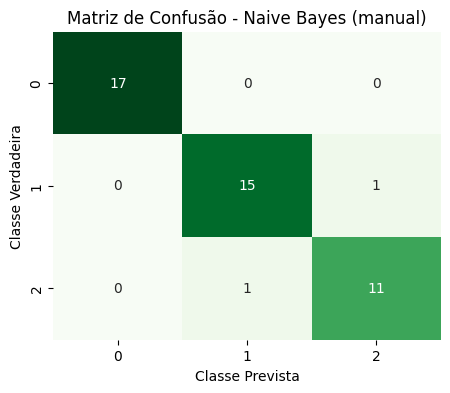

In [56]:
classes = np.unique(np.concatenate((y_test, y_pred)))
n_classes = len(classes)
cm = np.zeros((n_classes, n_classes), dtype=int)

for true, pred in zip(y_test, y_pred):
    i = np.where(classes == true)[0][0]
    j = np.where(classes == pred)[0][0]
    cm[i, j] += 1

# --- Plot da matriz ---
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão - Naive Bayes (manual)")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

In [57]:
def plot_feature_likelihoods(nb_model, feature_names):
    fig, axes = plt.subplots(1, len(feature_names), figsize=(18, 4))
    for i, feature in enumerate(feature_names):
        data = []
        classes = nb_model.classes
        for c in classes:
            likelihoods = nb_model.likelihoods[c][feature]
            probs = [likelihoods.get(cat, 0) for cat in ["low", "medium", "high"]]
            data.append(probs)

        data = np.array(data)
        x = np.arange(len(classes))
        width = 0.25

        axes[i].bar(x - width, data[:, 0], width, label="low")
        axes[i].bar(x, data[:, 1], width, label="medium")
        axes[i].bar(x + width, data[:, 2], width, label="high")

        axes[i].set_xticks(x)
        axes[i].set_xticklabels(classes)
        axes[i].set_title(feature)
        axes[i].set_ylim(0, 1)
        if i == 0:
            axes[i].set_ylabel("Probabilidade P(valor | classe)")
    plt.legend()
    plt.suptitle("Distribuição das probabilidades condicionais por classe")
    plt.tight_layout()
    plt.show()


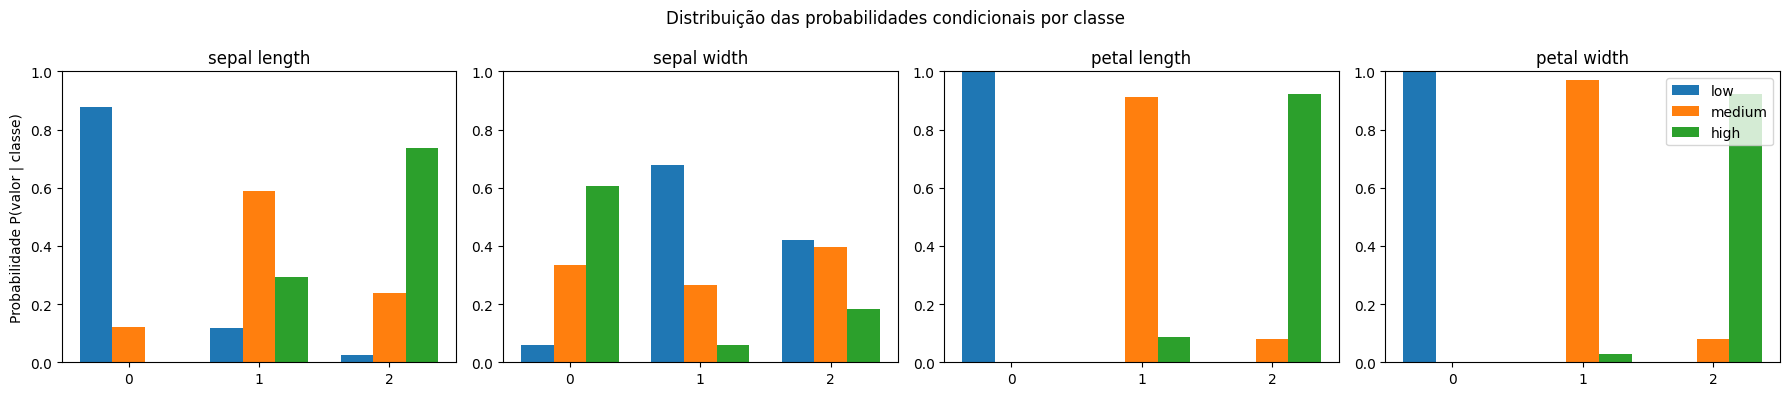

In [59]:
nb = NaiveBayesCategorical()
nb.fit(X_train, y_train)
plot_feature_likelihoods(nb, X_train.columns)

O k-NN consegue capturar melhor as fronteiras entre classes contínuas, como as medidas de pétalas e sépalas no dataset Iris.

O Naive Bayes, ao assumir independência entre features e ao discretizar as variáveis, perde alguma informação de precisão.

Contudo, o Naive Bayes é muito mais rápido e mais simples, sendo adequado para conjuntos de dados grandes ou de natureza simbólica.

Conclusão

Em termos de precisão, o k-NN supera o Naive Bayes no conjunto Iris,
mas o Naive Bayes é mais eficiente computacionalmente e mais fácil de interpretar.
Assim, a escolha depende do tipo de dados e da importância relativa entre velocidade e exatidão.

In [70]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import math

# ===============================
# 1. Carregar o dataset Iris
# ===============================
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target_names[iris.target]  # converte índices em nomes das espécies

# ===============================
# 2. Discretizar as features em 3 níveis (low, medium, high)
# ===============================
labels = ['low', 'medium', 'high']

# Cada coluna (feature) é dividida em 3 partes iguais (tercis)
X_discretized = X.apply(lambda col: pd.qcut(col, q=3, labels=labels)).to_numpy()

# ===============================
# 3. Função para dividir o dataset em subconjuntos
# ===============================
def split(feature_index):
    """
    Divide o conjunto de dados em três subconjuntos (low, medium, high)
    com base na feature indicada (feature_index).
    """
    low, medium, high = [], [], []
    for i in range(len(X_discretized)):
        level = X_discretized[i][feature_index]
        label = y[i]
        if level == 'low':
            low.append(label)
        elif level == 'medium':
            medium.append(label)
        elif level == 'high':
            high.append(label)
    return np.array(low), np.array(medium), np.array(high)

# ===============================
# 4. Cálculo da entropia
# ===============================
def entropy_calc(dataset):
    """
    Calcula a entropia de um conjunto de exemplos.
    Aqui, p+ = proporção de Iris-setosa, p− = restantes.
    """
    if len(dataset) == 0:
        return 0.0
    p_plus = np.sum(dataset == 'setosa') / len(dataset)
    p_minus = 1 - p_plus
    if p_plus == 0 or p_minus == 0:
        return 0.0
    return -p_plus * math.log2(p_plus) - p_minus * math.log2(p_minus)

# ===============================
# 5. Cálculo do ganho de informação
# ===============================
def gain_calc(feature_index):
    """
    Calcula o ganho de informação ao particionar o conjunto
    pela feature indicada.
    """
    low, medium, high = split(feature_index)
    ent_full = entropy_calc(y)  # entropia total (sem partição)
    # entropia ponderada após a partição
    weighted_ent = (
        len(low) * entropy_calc(low) +
        len(medium) * entropy_calc(medium) +
        len(high) * entropy_calc(high)
    ) / len(y)
    return ent_full - weighted_ent

# ===============================
# 6. Cálculo das entropias para a primeira feature (exemplo)
# ===============================
low, medium, high = split(0)
ent_full = entropy_calc(y)
ent_low = entropy_calc(low)
ent_medium = entropy_calc(medium)
ent_high = entropy_calc(high)

print(f"Entropia do conjunto completo: {ent_full:.4f}")
print(f"Entropia do Low Dataset: {ent_low:.4f}")
print(f"Entropia do Medium Dataset: {ent_medium:.4f}")
print(f"Entropia do High Dataset: {ent_high:.4f}")

# ===============================
# 7. Cálculo do ganho da primeira feature
# ===============================
gain_first = gain_calc(0)
print(f"\nGain(S, a) para a primeira feature (sepal length): {gain_first:.4f}")
print(f"Isto significa que a partição reduz a incerteza em {gain_first:.4f} bits.")
print(f"Antes da partição, a capacidade de classificar é limitada pela entropia alta ({ent_full:.4f});")
print("depois da partição, os subconjuntos têm entropia menor, melhorando a classificação.\n")

# ===============================
# 8. Ganhos de informação para todas as features
# ===============================
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
gains = {}

for i, feature in enumerate(features):
    low, medium, high = split(i)
    ent_low = entropy_calc(low)
    ent_medium = entropy_calc(medium)
    ent_high = entropy_calc(high)
    gain_value = gain_calc(i)
    gains[feature] = gain_value

    print(f"Feature: {feature}")
    print(f"  Entropia Low: {ent_low:.4f}")
    print(f"  Entropia Medium: {ent_medium:.4f}")
    print(f"  Entropia High: {ent_high:.4f}")
    print(f"  Gain(S, {feature}): {gain_value:.4f}\n")

# Identificar a feature com maior ganho
max_feature = max(gains, key=gains.get)
print(f"\nFeature com maior ganho: {max_feature} ({gains[max_feature]:.4f})")
print("Esta feature tem maior poder de discriminação, separando melhor as amostras setosa vs. não-setosa.\n")

# ===============================
# 9. Explicação sobre a árvore de decisão
# ===============================
print("Como construir uma árvore de decisão (ID3):")
print("1. Calcular o ganho de informação de todas as features.")
print("2. Escolher a feature com maior ganho como nó raiz.")
print("3. Dividir o conjunto em subconjuntos (low, medium, high) com base nessa feature.")
print("4. Repetir o processo recursivamente para cada subconjunto, usando as features restantes.")
print("5. Parar quando um subconjunto for puro (entropia = 0) ou não houver ganho adicional.")
print("A árvore resultante classifica novos exemplos percorrendo os ramos até uma folha.")

Entropia do conjunto completo: 0.9183
Entropia do Low Dataset: 0.5700
Entropia do Medium Dataset: 0.4341
Entropia do High Dataset: 0.0000

Gain(S, a) para a primeira feature (sepal length): 0.5587
Isto significa que a partição reduz a incerteza em 0.5587 bits.
Antes da partição, a capacidade de classificar é limitada pela entropia alta (0.9183);
depois da partição, os subconjuntos têm entropia menor, melhorando a classificação.

Feature: sepal length
  Entropia Low: 0.5700
  Entropia Medium: 0.4341
  Entropia High: 0.0000
  Gain(S, sepal length): 0.5587

Feature: sepal width
  Entropia Low: 0.2193
  Entropia Medium: 0.8813
  Entropia High: 0.7824
  Gain(S, sepal width): 0.3169

Feature: petal length
  Entropia Low: 0.0000
  Entropia Medium: 0.0000
  Entropia High: 0.0000
  Gain(S, petal length): 0.9183

Feature: petal width
  Entropia Low: 0.0000
  Entropia Medium: 0.0000
  Entropia High: 0.0000
  Gain(S, petal width): 0.9183


Feature com maior ganho: petal length (0.9183)
Esta featur